<a href="https://colab.research.google.com/github/sadafsayeed/Kaggle_Competitions_Submissions/blob/main/FloodPredictionProbability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e5:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F73278%2F8121328%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240518%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240518T114712Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D66e810f903c0757813e54e45b99754b8b8940428b722081427e1909bfd9c7d3d285312b58828ac219ff65e0a56537fad8ca2f914280a97eb7d715327d19eb91ccaaf131dd62d0db8eef1f6113e08209034d73568629e9406eb848d4657331d22d6a44599830c668628595853d2345f88dd8ba4a8ed026e46d7f51f0f38f3458451c4e3b319fd424d74b12f596b26dc3f85785b2451bf29e25788fb20513e903fb762f705edbb4d696f68575f67afcbb7b864cd35b71b9056a33369789d5eb43697221fc6ea2bf08c2a5e6de2af2a554ab620797973451a2afaf51df7ed12bb23af07619a63c8d6a6a07e6876f39123b5614ca2a8b911c41d3e8a27efb57026e6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [ ]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

train_data

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [ ]:
train_data.columns, type(train_data), train_data.shape

(Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
        'Siltation', 'AgriculturalPractices', 'Encroachments',
        'IneffectiveDisasterPreparedness', 'DrainageSystems',
        'CoastalVulnerability', 'Landslides', 'Watersheds',
        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
        'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
       dtype='object'),
 pandas.core.frame.DataFrame,
 (1117957, 22))

In [ ]:
test_data = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [ ]:
test_data.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [ ]:
columns = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement','Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality','Siltation', 'AgriculturalPractices', 'Encroachments','IneffectiveDisasterPreparedness', 'DrainageSystems','CoastalVulnerability', 'Landslides', 'Watersheds','DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss','InadequatePlanning', 'PoliticalFactors']
X = train_data[columns]
y = train_data["FloodProbability"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X_test.shape, y_test.shape

((223592, 20), (223592,))

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
X_train_tensor.dtype, X_train_tensor[:3], X_train_tensor.shape, y_train_tensor.shape

(torch.float32,
 tensor([[ 8.,  7.,  7.,  6.,  4.,  3., 13.,  8.,  3.,  2.,  5.,  6.,  6.,  6.,
           5.,  5.,  2.,  6.,  4.,  7.],
         [ 7.,  4.,  4.,  2.,  4.,  5.,  7.,  3.,  6.,  2.,  2.,  6.,  5.,  0.,
           6.,  2.,  5.,  4.,  3.,  4.],
         [ 6.,  5.,  1.,  6.,  6.,  7.,  3.,  5.,  6.,  4.,  4.,  5.,  7.,  6.,
           5.,  4.,  9.,  3.,  5.,  3.]]),
 torch.Size([894365, 20]),
 torch.Size([894365]))

In [ ]:
class model(nn.Module):
    def __init__(self):
        super(). __init__()
        self.layer1 = nn.Linear(in_features = 20, out_features = 400)
        self.layer2 = nn.Linear(in_features = 400, out_features = 400)
        self.layer3 = nn.Linear(in_features = 400, out_features = 400)
        self.layer4 = nn.Linear(in_features = 400, out_features = 400)
        self.layer5 = nn.Linear(in_features = 400, out_features = 1)

    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x
model_0 = model().to(device)
model_0

model(
  (layer1): Linear(in_features=20, out_features=400, bias=True)
  (layer2): Linear(in_features=400, out_features=400, bias=True)
  (layer3): Linear(in_features=400, out_features=400, bias=True)
  (layer4): Linear(in_features=400, out_features=400, bias=True)
  (layer5): Linear(in_features=400, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [ ]:
def accuracy_fn(y_pred, y_true):
  percent = ((torch.mean(torch.abs(y_true - y_pred) / torch.abs(y_true))*100)).item()
  return 100 - percent

In [ ]:
torch.manual_seed(42)
epochs = 140

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train_tensor).squeeze()

    loss = loss_fn(y_pred, y_train_tensor)
    acc = accuracy_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test_tensor).squeeze()

        test_loss = loss_fn(test_pred, y_test_tensor)
        test_acc = accuracy_fn(test_pred, y_test_tensor)


        if epoch%10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.3f}| Test Loss: {test_loss:.4f}| Test Acc: {test_acc:.3f} ")


Epoch: 0 | Loss: 0.6938 | Accuracy: -37.611| Test Loss: 7.8348| Test Acc: -1457.275 
Epoch: 10 | Loss: 1.2563 | Accuracy: -149.372| Test Loss: 1.1370| Test Acc: -125.641 
Epoch: 20 | Loss: 0.2694 | Accuracy: 46.744| Test Loss: 0.0358| Test Acc: 92.964 
Epoch: 30 | Loss: 0.0311 | Accuracy: 93.589| Test Loss: 0.1116| Test Acc: 77.520 
Epoch: 40 | Loss: 0.0539 | Accuracy: 89.581| Test Loss: 0.0194| Test Acc: 96.139 
Epoch: 50 | Loss: 0.0317 | Accuracy: 93.966| Test Loss: 0.0319| Test Acc: 93.368 
Epoch: 60 | Loss: 0.0218 | Accuracy: 95.444| Test Loss: 0.0195| Test Acc: 96.191 
Epoch: 70 | Loss: 0.0177 | Accuracy: 96.372| Test Loss: 0.0195| Test Acc: 95.939 
Epoch: 80 | Loss: 0.0174 | Accuracy: 96.506| Test Loss: 0.0181| Test Acc: 96.270 
Epoch: 90 | Loss: 0.0172 | Accuracy: 96.471| Test Loss: 0.0171| Test Acc: 96.583 
Epoch: 100 | Loss: 0.0207 | Accuracy: 96.002| Test Loss: 0.0209| Test Acc: 95.654 
Epoch: 110 | Loss: 0.0240 | Accuracy: 95.012| Test Loss: 0.0190| Test Acc: 96.315 
Epoch: 

In [ ]:
model_0.eval()
with torch.inference_mode():
    p = (model_0(X_test_tensor)).squeeze()

p[:10]

tensor([0.5329, 0.5804, 0.5211, 0.5376, 0.5752, 0.6397, 0.4689, 0.4953, 0.4093,
        0.4735], device='cuda:0')

In [ ]:
y_test[:10]

1105809    0.560
442591     0.575
5434       0.510
82966      0.530
584893     0.590
998013     0.630
397526     0.455
1020376    0.510
764949     0.395
200261     0.460
Name: FloodProbability, dtype: float64

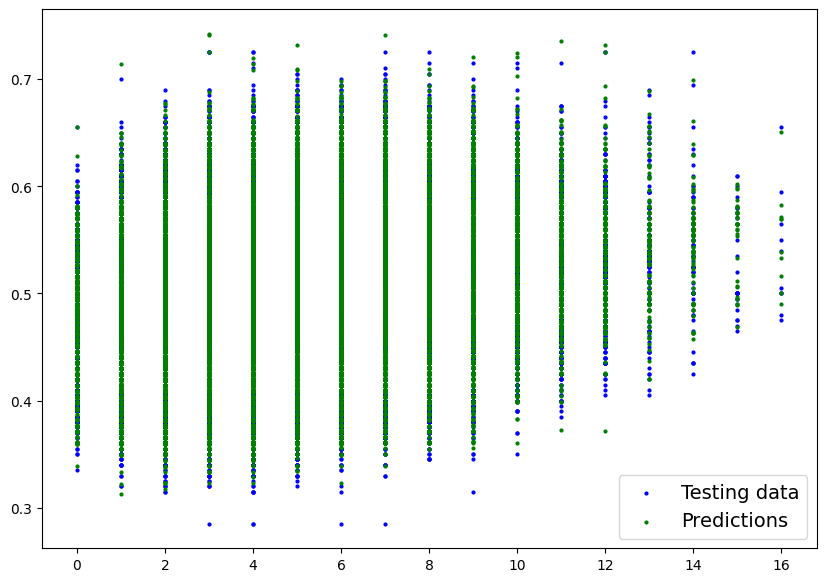

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test_tensor[:,0].cpu().detach().numpy(), y_test_tensor.cpu().detach().numpy(), c="b", s=4, label="Testing data")
plt.scatter(X_test_tensor[:,0].cpu().detach().numpy(), p.cpu().detach().numpy(), c = "g", s=4, label="Predictions")
plt.legend(prop={"size":14})

In [ ]:
X_pred = test_data[columns]
X_pred = torch.tensor(X_pred.values, dtype=torch.float32)
X_pred = X_pred.to(device)

In [ ]:
model_0.eval()
with torch.inference_mode():
    prediction = (model_0(X_pred)).squeeze()

prediction[:10]

tensor([0.5700, 0.4575, 0.4563, 0.4671, 0.4684, 0.5054, 0.5321, 0.5273, 0.4736,
        0.5694], device='cuda:0')

In [ ]:
test_data["FloodProbability"] = prediction.cpu().detach().numpy()

test_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,1117957,4,6,3,5,6,7,8,7,8,...,5,7,5,6,3,6,4,4,5,0.570004
1,1117958,4,4,2,9,5,5,4,7,5,...,4,7,4,5,1,7,4,4,3,0.457538
2,1117959,1,3,6,5,7,2,4,6,4,...,9,2,5,5,2,3,6,8,3,0.456274
3,1117960,2,4,4,6,4,5,4,3,4,...,8,4,6,7,6,4,2,4,4,0.467081
4,1117961,6,3,2,4,6,4,5,5,3,...,3,2,6,4,6,8,4,5,5,0.468400


In [ ]:
test_data[["id", "FloodProbability"]].to_csv("submission.csv", index=False)